### Code implementation - A pulse of the Earth: A 27.5-Myr underlying cycle in coordinated geological events over the last 260 Myr by Michael R. Rampino, Ken Caldeira and Yuhong Zhu


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

### Columns in the dataset are main events in the geological record (compiled by Rampino et al, 2021) as provided in the paper

## Data cleaning

The idea is to leave a list of dates to see any recurrent pattern

In [2]:
df = pd.read_excel("geological_events.xlsx")
df.columns

Index(['IntervalMa', 'MarineExtinction', 'AnoxicEvent', 'ContinentalBasalt',
       'SequenceBoundary', 'NonMarineExtinction', 'ChangesSpreadingRate',
       'IntraPlateVolcanism'],
      dtype='object')

In [3]:
df # original dataframe as is in the paper

,IntervalMa,MarineExtinction,AnoxicEvent,ContinentalBasalt,SequenceBoundary,NonMarineExtinction,ChangesSpreadingRate,IntraPlateVolcanism
0,0–9,2.6,—,—,5.33,7.25,—,3
1,10–19,11.6,—,16.6 ± 0.03,11.63,—,—,"10, 15"
2,20–29,—,—,—,23.03,—,—,23
3,30–39,36.5,—,30.4 ± 0.4,33.9,33.9,—,30
4,40–49,—,—,41.2,—,—,40,NaN
5,50–59,—,56.0,56.6 ± 0.3,52.0,—,"50, 58",—
6,60–69,66.04,66,61.9; 66.3,61.6; 68,66,—,"60, 65"
7,70–79,—,—,—,—,—,75,—
8,80–89,—,—,—,84.2,—,80,—
9,90–99,93.9,93.9,92.9 ± 3.8,93.9,—,—,—


In [4]:
# replace non numeric values with Nan
df.replace("—", np.nan, inplace=True)
df.replace("____", np.nan, inplace=True)
df



,IntervalMa,MarineExtinction,AnoxicEvent,ContinentalBasalt,SequenceBoundary,NonMarineExtinction,ChangesSpreadingRate,IntraPlateVolcanism
0,0–9,2.6,NaN,NaN,5.33,7.25,NaN,3
1,10–19,11.6,NaN,16.6 ± 0.03,11.63,NaN,NaN,"10, 15"
2,20–29,NaN,NaN,NaN,23.03,NaN,NaN,23
3,30–39,36.5,NaN,30.4 ± 0.4,33.9,33.9,NaN,30
4,40–49,NaN,NaN,41.2,NaN,NaN,40,NaN
5,50–59,NaN,56.0,56.6 ± 0.3,52.0,NaN,"50, 58",NaN
6,60–69,66.04,66,61.9; 66.3,61.6; 68,66,NaN,"60, 65"
7,70–79,NaN,NaN,NaN,NaN,NaN,75,NaN
8,80–89,NaN,NaN,NaN,84.2,NaN,80,NaN
9,90–99,93.9,93.9,92.9 ± 3.8,93.9,NaN,NaN,NaN


In [5]:
marine_extinction = df["MarineExtinction"]
anoxic_event = df["AnoxicEvent"]
continental_basalt = df["ContinentalBasalt"]
sequence_boundary = df["SequenceBoundary"]
nonmarine_extinction = df["NonMarineExtinction"]
changes_spreading_rate = df["ChangesSpreadingRate"]
intraplate_volcanism = df["IntraPlateVolcanism"]

data_columns = [marine_extinction, anoxic_event, continental_basalt, sequence_boundary, nonmarine_extinction, changes_spreading_rate, intraplate_volcanism]

In [6]:
def cleanColumns(column: pd.Series) -> list:
    
    ls = list(column)
    ls_temp = [] 
    for i in ls:
        ls_temp += str(i).split(";")

    ls_temp = [i.split("±") for i in ls_temp]
    


    def extract(lst):
        return [item[0] for item in lst if type(item)==list]

    def convertFloat(lst):
        return [float(item) for item in lst]

    result = extract(ls_temp)
    return list(result)

In [7]:
temp_dates = []
for i in data_columns:
    i = cleanColumns(i)
    temp_dates.append(i)


In [8]:
raw_dates = []
for i in temp_dates:
    i = [x.split(",") for x in i]
    raw_dates.append(i)

In [11]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

def convertFloat(lst):
    return [float(item) for item in lst]


# flatten_twice
list_dates = flatten_list(flatten_list(raw_dates))
# convert all elements to float
float_dates = convertFloat(list_dates)
# clean of Nans
cleaned_dates = [x for x in float_dates if str(x) != 'nan']

In [12]:
len(cleaned_dates) # total of events is correct!

89

In [74]:
max(cleaned_dates)

260.0

<AxesSubplot:ylabel='Count'>

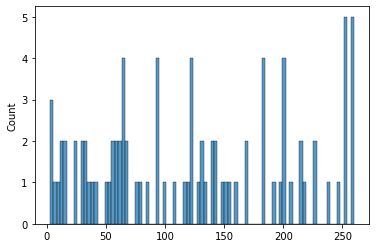

In [21]:
sns.histplot(cleaned_dates, bins=89)

## Moving window analysis

In [70]:
dates = pd.DataFrame(cleaned_dates)
dates.columns = ["events"]
dates

,events
0,2.60
1,11.60
2,36.50
3,66.04
4,93.90
...,...
84,15.00
85,23.00
86,30.00
87,60.00


In [134]:
dates_list = dates["events"].tolist()
dates_list = sorted(dates_list)


In [128]:
for index, row in dates.iterrows():
    print(row["events"])

2.6
11.6
36.5
66.04
93.9
124.0
143.1
184.2
201.4
215.0
251.9
259.8
56.0
66.0
93.9
124.0
132.6
152.0
184.2
201.4
251.9
259.8
16.6
30.4
41.2
56.6
61.9
66.3
92.9
118.0
123.5
134.7
182.7
201.5
228.0
251.9
259.6
5.33
11.63
23.03
33.9
52.0
61.6
68.0
84.2
93.9
100.0
109.0
124.0
129.4
132.6
139.8
149.2
161.5
170.3
184.2
190.8
199.0
205.7
218.0
227.3
237.0
247.0
252.0
260.0
7.25
33.9
66.0
143.1
201.4
215.0
251.9
259.8
40.0
50.0
58.0
75.0
80.0
120.0
140.0
155.0
170.0
3.0
10.0
15.0
23.0
30.0
60.0
65.0


In [119]:
resample = np.linspace(0,260,260*2)
df_resampled = dates.reindex(dates.index.union(resample)).loc[resample]
df_resampled = df_resampled.reset_index()
df_resampled = df_resampled.round(1)
df_resampled.drop(columns=["events"], inplace=True)
df_resampled["events"] = np.nan
df_resampled.rename(columns={"index": "rate"}, inplace=True)

In [120]:
for index, row in df_resampled.iterrows():
    for i in row:
        
    if row["rate"]%10 == 0:
        row["events"] = 10
    print(row['rate'], row['events'])

0.0 10.0
0.5 nan
1.0 nan
1.5 nan
2.0 nan
2.5 nan
3.0 nan
3.5 nan
4.0 nan
4.5 nan
5.0 nan
5.5 nan
6.0 nan
6.5 nan
7.0 nan
7.5 nan
8.0 nan
8.5 nan
9.0 nan
9.5 nan
10.0 10.0
10.5 nan
11.0 nan
11.5 nan
12.0 nan
12.5 nan
13.0 nan
13.5 nan
14.0 nan
14.5 nan
15.0 nan
15.5 nan
16.0 nan
16.5 nan
17.0 nan
17.5 nan
18.0 nan
18.5 nan
19.0 nan
19.5 nan
20.0 10.0
20.5 nan
21.0 nan
21.5 nan
22.0 nan
22.5 nan
23.0 nan
23.5 nan
24.0 nan
24.5 nan
25.0 nan
25.5 nan
26.1 nan
26.6 nan
27.1 nan
27.6 nan
28.1 nan
28.6 nan
29.1 nan
29.6 nan
30.1 nan
30.6 nan
31.1 nan
31.6 nan
32.1 nan
32.6 nan
33.1 nan
33.6 nan
34.1 nan
34.6 nan
35.1 nan
35.6 nan
36.1 nan
36.6 nan
37.1 nan
37.6 nan
38.1 nan
38.6 nan
39.1 nan
39.6 nan
40.1 nan
40.6 nan
41.1 nan
41.6 nan
42.1 nan
42.6 nan
43.1 nan
43.6 nan
44.1 nan
44.6 nan
45.1 nan
45.6 nan
46.1 nan
46.6 nan
47.1 nan
47.6 nan
48.1 nan
48.6 nan
49.1 nan
49.6 nan
50.1 nan
50.6 nan
51.1 nan
51.6 nan
52.1 nan
52.6 nan
53.1 nan
53.6 nan
54.1 nan
54.6 nan
55.1 nan
55.6 nan
56.1 nan


In [135]:
for index, row in df_resampled.iterrows():
    for i in list_dates:
            
            
        if(0 < (i - row["rate"]) < 0.5):
            print(row['rate'], i)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [97]:
df_resampled

,index,events
0,0.0,2.60
1,0.5,11.60
2,1.0,36.50
3,1.5,66.04
4,2.0,93.90
...,...,...
515,258.0,NaN
516,258.5,NaN
517,259.0,NaN
518,259.5,NaN


In [42]:
dates.events_ma.hist(bins=89)

TypeError: '<' not supported between instances of 'Rolling' and 'float'

<AxesSubplot:>

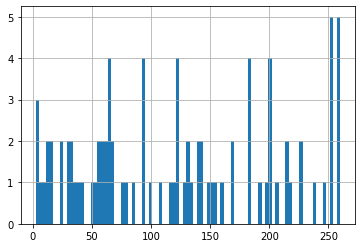

In [40]:
dates.events.hist(bins=89)

## Gaussian Smoothing

## Fourier Analysis